# MNIST TUTORIAL

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/01-mnist.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/01-mnist.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/01-mnist.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table>

### Start EVA server

We are reusing the start server notebook for launching the EVA server.

In [1]:
!pip install evadb

In [2]:
import eva

from eva.interfaces.relational.db import connect

cursor = connect().cursor()


### Downloading the videos

In [3]:
# Getting MNIST as a video
!wget -nc https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4

File 'mnist.mp4' already there; not retrieving.



### Upload the video for analysis

In [4]:
cursor.query("DROP TABLE IF EXISTS MNISTVid").execute()

cursor.load(file_regex='mnist.mp4', format="video", table_name="MNISTVid").df()

,0
0,Number of loaded VIDEO: 1


### Visualize Video

In [5]:
from IPython.display import Video
Video("mnist.mp4", embed=True)

### Run the Image Classification UDF on video

In [6]:

query = cursor.table("MNISTVid")
query = query.select("data, MnistImageClassifier(data).label")
query = query.filter("id = 30 OR id = 50 OR id = 70 OR id = 0 OR id = 140")

print(query.sql_query())

response = query.df()
print(response)

SELECT data, MnistImageClassifier(data) FROM MNISTVid WHERE ((id = 30) OR ((id = 50) OR ((id = 70) OR ((id = 0) OR (id = 140)))))


2023-06-03 00:21:19,447	INFO worker.py:1625 -- Started a local Ray instance.


                                       mnistvid.data mnistimageclassifier.label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                          6
1  [[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...                          2
2  [[[13, 13, 13], [2, 2, 2], [2, 2, 2], [13, 13,...                          3
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                          7
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                          5


### Visualize output of query on the video

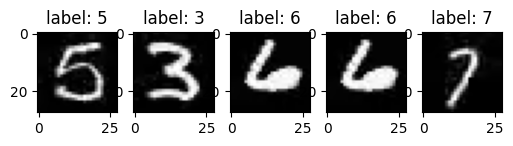

(raylet) [2023-06-03 00:21:29,427 E 2133417 2133501] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-06-03_00-21-17_547485_2087777 is over 95% full, available space: 10704609280; capacity: 249153527808. Object creation will fail if spilling is required.


In [7]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=[6,8])

for axi in ax.flat:
    idx = np.random.randint(len(response))
    img = response['mnistvid.data'].iloc[idx]
    label = response['mnistimageclassifier.label'].iloc[idx]
    axi.imshow(img)
    
    axi.set_title(f'label: {label}')

plt.show()